# Una popolazione

In [2]:
# plots will be shown inline 
%matplotlib inline 
import matplotlib.pyplot as plt

import numpy
from numpy import sqrt,floor
import numpy.random as rnd

import numpy as np
import scipy as sp
from scipy import stats

from scipy.optimize import curve_fit

import pandas as pd
import random

import math

## Costanti 

In [3]:
mu=0.5 #prob di scegliere 2 individui
c=0.5 #rate competizione
b=0.5 #rate nascita
d=0.5 #rate morte


N=100 #numero totale posti 
n_0=N/2 #numero iniziale pop A

fi0=n_0/N #densità iniziale

#variabili tildate
ct=mu*c/(N-1)
bt=mu*d/(N-1)
dt=(1-mu)*c/N

#Variabili della mappa
r=2*bt-dt
a=2*(bt+ct)/N

    
#Variabili della soluzione
rho=2*bt-dt
sigma=2*bt+ct
A=sigma-rho/fi0
print("ciao")

 ### Probabilità di pescare 

In [4]:
def p_AA(n):              #prob pescare AA
    return (mu*n*(n-1)/(N*(N-1)))


def p_AE(n):              #prob pescare AE
    return (2*mu*n*(N-n)/(N*(N-1)))


def p_A(n):              #prob pescare A
    return ((1-mu)*n/N)

### Probabilità di transire

In [5]:
def Tm(n): #n-> n-1
    
    if(n<=0 or n>=N+1 ):
        return (0)
    else:
        return (c*p_AA(n)+d*p_A(n))


     
def Tp(n): #n-> n+1
    if(n<=-1 or n>=N ):
        return (0)
    else:
        return (b*p_AE(n))

### Soluzione mappa logistica

In [6]:
def logistica(t):
    #variabili tildate
    ct=mu*c/(N-1)
    bt=mu*d/(N-1)
    dt=(1-mu)*c/N
    
    #Variabili della mappa
    r=2*bt-dt
    a=2*(bt+ct)/N
    
    #Variabili della soluzione
    rho=2*bt-dt
    sigma=2*bt+ct
    A=sigma-rho/fi0
    
    return(rho/(sigma-A*np.exp(-rho*t)))

### Funzione simulazione

In [7]:
def nascita_morte(n,t_max):
    t=0
    for t in range(0, t_max, 1):
        rand=rnd.random()
        
        
        if(rand<Tm(n[t])):
            n[t+1]=n[t]-1
            
            
        elif(rand>=Tm(n[t]) and rand<Tm(n[t])+Tp(n[t])):
            n[t+1]=n[t]+1
            
            
        else:
            n[t+1]=n[t]
            

### Definire matrici

In [8]:
def matrix(x,y):
    matrix = []
    
    for i in range(x):
        n = []

        for j in range(y):
            number = rnd.random()  
            n.insert(i,number)

        matrix.append(n)

    return matrix

# Confonto MF-Simulazioni

### N=100 e parametri tutti a 0.5

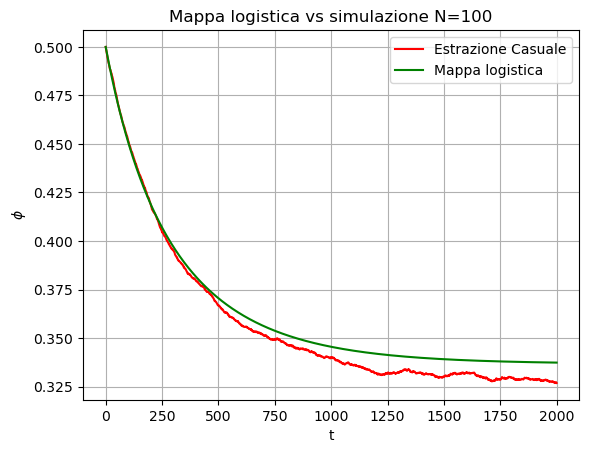

In [13]:
#simulazione N=100, 1000 samples
t_max=2000
n=np.zeros(t_max)


n[0]=n_0
ntot=np.zeros(t_max)
ntot2=np.zeros(t_max)
samples=1000

for i in range (0,samples):
    
    nascita_morte(n,t_max-1)
    ntot=ntot+n
    ntot2=ntot2+n**2
    #if (i==0):
        #print(n)
    
nMedio=ntot/samples
n2Medio=ntot2/samples


fi_medio=nMedio/N


#Soluzione EDO
t=np.linspace(0,t_max-1,t_max)

fi_log=logistica(t)


#grafico
plt.plot(t,fi_medio,color="red",label="Estrazione Casuale")
plt.plot(t,fi_log,color="green",label="Mappa logistica")
plt.xlabel("t")
plt.ylabel(r"$\phi$")
plt.title("Mappa logistica vs simulazione N=100")
plt.grid()
plt.legend()

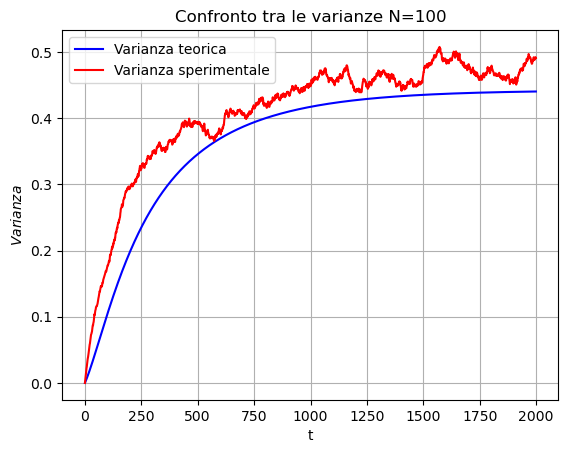

In [14]:
var=(n2Medio-nMedio**2)/N

var_teo=1/(sigma-A*np.exp(-rho*t))**4*(2*sigma**2*bt*(ct+dt)*(1-np.exp(-2*rho*t))-sigma*A*(4*bt**2+10*bt*(ct+dt)+ct*dt)*np.exp(-rho*t)*(1-np.exp(-rho*t))+2*A**2*rho*(4*bt**2+4*bt*(ct*dt)+ct*dt)*t*np.exp(-2*rho*t)-A**3*(2*bt+dt)*np.exp(-2*rho*t)*(1-np.exp(-rho*t)))
#esp2*N**2-Na_log**2
plt.plot(t,var_teo,color="blue",label="Varianza teorica")
plt.plot(t,var,color="red",label="Varianza sperimentale")

plt.xlabel("t")
plt.ylabel(r"$Varianza$")
plt.title("Confronto tra le varianze N=100")
plt.grid()
plt.legend()

### N=10 e parametri tutti a 0.5

In [15]:
N=10
n_0=5

#variabili tildate
ct=mu*c/(N-1)
bt=mu*d/(N-1)
dt=(1-mu)*c/N

#Variabili della mappa
r=2*bt-dt
a=2*(bt+ct)/N

    
#Variabili della soluzione
rho=2*bt-dt
sigma=2*bt+ct
A=sigma-rho/fi0

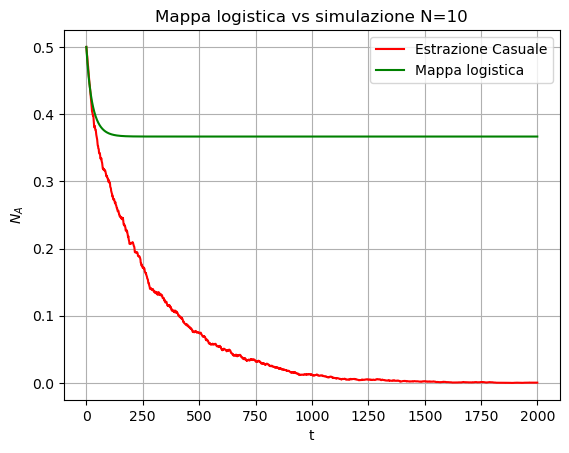

In [17]:
t_max=2000
n=np.zeros(t_max)


n[0]=n_0
ntot=np.zeros(t_max)
ntot2=np.zeros(t_max)
samples=1000

for i in range (0,samples):
    
    nascita_morte(n,t_max-1)
    ntot=ntot+n
    ntot2=ntot2+n**2
    #if (i==0):
        #print(n)
    
nMedio=ntot/samples
n2Medio=ntot2/samples


fi_medio=nMedio/N


#Soluzione EDO
t=np.linspace(0,t_max-1,t_max)
fi_log=logistica(t)


#grafico
plt.plot(t,fi_medio,color="red",label="Estrazione Casuale")
plt.plot(t,fi_log,color="green",label="Mappa logistica")
plt.xlabel("t")
plt.ylabel(r"$N_A$")
plt.title("Mappa logistica vs simulazione N=10")
plt.grid()
plt.legend()

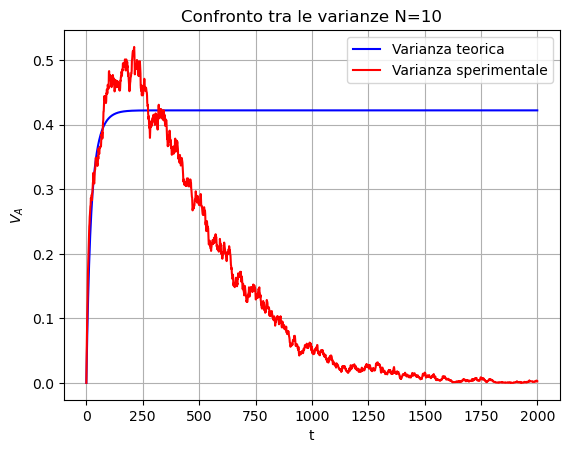

In [18]:
var=(n2Medio-nMedio**2)/N
var_teo=1/(sigma-A*np.exp(-rho*t))**4*(2*sigma**2*bt*(ct+dt)*(1-np.exp(-2*rho*t))-sigma*A*(4*bt**2+10*bt*(ct+dt)+ct*dt)*np.exp(-rho*t)*(1-np.exp(-rho*t))+2*A**2*rho*(4*bt**2+4*bt*(ct*dt)+ct*dt)*t*np.exp(-2*rho*t)-A**3*(2*bt+dt)*np.exp(-2*rho*t)*(1-np.exp(-rho*t)))
#esp2*N**2-Na_log**2
plt.plot(t,var_teo,color="blue",label="Varianza teorica")
plt.plot(t,var,color="red",label="Varianza sperimentale")

plt.xlabel("t")
plt.ylabel(r"$V_A$")
plt.title("Confronto tra le varianze N=10")
plt.grid()
plt.legend()

### N=400 e tutto a 0.5

In [22]:
N=400
n_0=200

#variabili tildate
ct=mu*c/(N-1)
bt=mu*d/(N-1)
dt=(1-mu)*c/N

#Variabili della mappa
r=2*bt-dt
a=2*(bt+ct)/N

    
#Variabili della soluzione
rho=2*bt-dt
sigma=2*bt+ct
A=sigma-rho/fi0

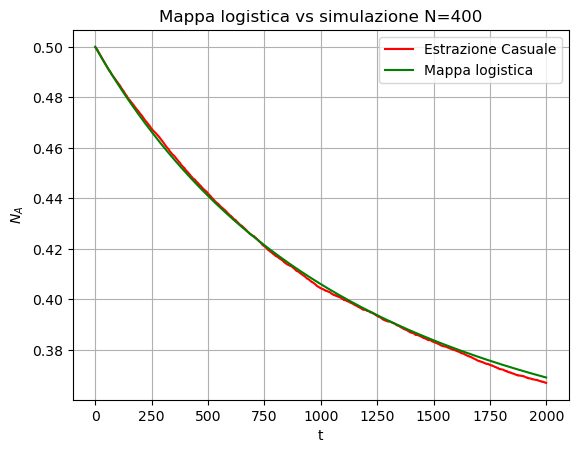

In [23]:
t_max=2000
n=np.zeros(t_max)


n[0]=n_0
ntot=np.zeros(t_max)
ntot2=np.zeros(t_max)
samples=1000

for i in range (0,samples):
    
    nascita_morte(n,t_max-1)
    ntot=ntot+n
    ntot2=ntot2+n**2
    #if (i==0):
        #print(n)
    
nMedio=ntot/samples
n2Medio=ntot2/samples


fi_medio=nMedio/N


#Soluzione EDO
t=np.linspace(0,t_max-1,t_max)
fi_log=logistica(t)


#grafico
plt.plot(t,fi_medio,color="red",label="Estrazione Casuale")
plt.plot(t,fi_log,color="green",label="Mappa logistica")
plt.xlabel("t")
plt.ylabel(r"$N_A$")
plt.title("Mappa logistica vs simulazione N=400")
plt.grid()
plt.legend()

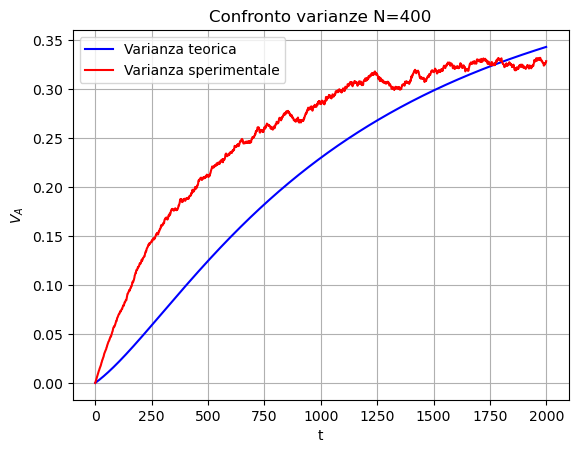

In [24]:
var=(n2Medio-nMedio**2)/N
var_teo=1/(sigma-A*np.exp(-rho*t))**4*(2*sigma**2*bt*(ct+dt)*(1-np.exp(-2*rho*t))-sigma*A*(4*bt**2+10*bt*(ct+dt)+ct*dt)*np.exp(-rho*t)*(1-np.exp(-rho*t))+2*A**2*rho*(4*bt**2+4*bt*(ct*dt)+ct*dt)*t*np.exp(-2*rho*t)-A**3*(2*bt+dt)*np.exp(-2*rho*t)*(1-np.exp(-rho*t)))
#esp2*N**2-Na_log**2
plt.plot(t,var_teo,color="blue",label="Varianza teorica")
plt.plot(t,var,color="red",label="Varianza sperimentale")

plt.xlabel("t")
plt.ylabel(r"$V_A$")
plt.title("Confronto varianze N=400")
plt.grid()
plt.legend()

# Dipendenza da parametri

### Dipendenza da n_0

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
Nfisso= 33.416666666666664


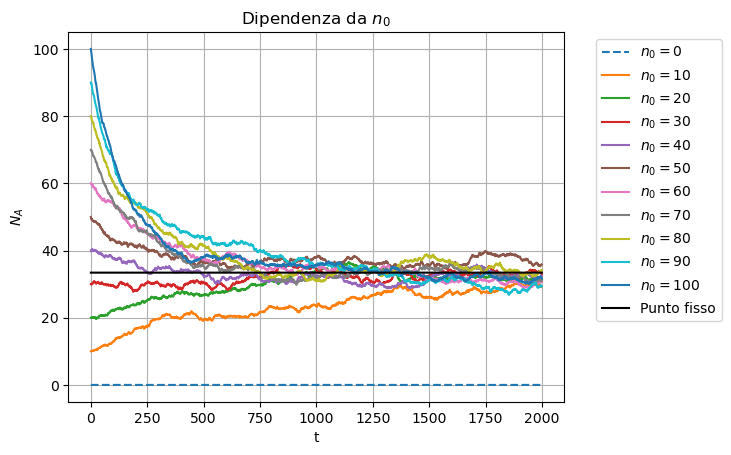

In [39]:
N=100

t_max=2000
t=np.linspace(0,t_max-1,t_max)
matrice=matrix(11,t_max)
for k in range (0,11,1):
    
    n=np.zeros(t_max)
    n[0]=k*N/10
    print(n[0])
    
    
    ntot=np.zeros(t_max)
    samples=10
    

    for i in range (0,samples):
        

        nascita_morte(n,t_max-1)
        ntot=ntot+n
        for j in range (0,t_max,1):
            matrice[k][j]=ntot[j]/samples
            
            
#Calcolo valore fisso
N_fisso=N*(2*bt-dt)/(2*bt+ct)
print('Nfisso=',N_fisso)             
            
plt.plot(t,matrice[0],'--',label="$n_0=0$")
plt.plot(t,matrice[1] ,label="$n_0=10$")
plt.plot(t,matrice[2],label="$n_0=20$")
plt.plot(t,matrice[3],label="$n_0=30$")
plt.plot(t,matrice[4],label="$n_0=40$")
plt.plot(t,matrice[5],label="$n_0=50$")
plt.plot(t,matrice[6],label="$n_0=60$")
plt.plot(t,matrice[7],label="$n_0=70$")
plt.plot(t,matrice[8],label="$n_0=80$")
plt.plot(t,matrice[9],label="$n_0=90$")
plt.plot(t,matrice[10],label="$n_0=100$")
plt.plot(t,N_fisso*np.repeat(1,len(t)),color='black',label='Punto fisso')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("t")
plt.ylabel(r"$N_A$")
plt.title(r"Dipendenza da $n_0$")


n_0=50 #torno a iniziale

### Dipendenza da µ

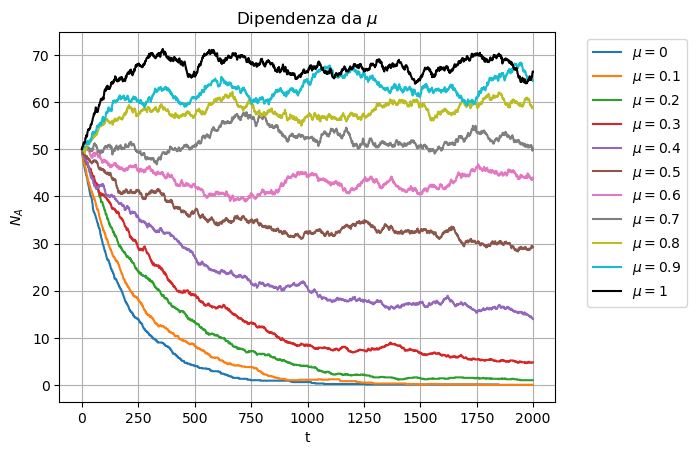

In [31]:

t=np.linspace(0,t_max-1,t_max)
matrice=matrix(11,t_max)
for k in range (0,11,1):
    
    n=np.zeros(t_max)
    mu=0.1*k

    n[0]=n_0
    
    
    
    ntot=np.zeros(t_max)
    samples=10
    

    for i in range (0,samples):
        

        nascita_morte(n,t_max-1)
        ntot=ntot+n
        for j in range (0,t_max,1):
            matrice[k][j]=ntot[j]/samples
            
plt.plot(t,matrice[0],label="$\mu=0$")
plt.plot(t,matrice[1] ,label="$\mu=0.1$")
plt.plot(t,matrice[2],label="$\mu=0.2$")
plt.plot(t,matrice[3],label="$\mu=0.3$")
plt.plot(t,matrice[4],label="$\mu=0.4$")
plt.plot(t,matrice[5],label="$\mu=0.5$")
plt.plot(t,matrice[6],label="$\mu=0.6$")
plt.plot(t,matrice[7],label="$\mu=0.7$")
plt.plot(t,matrice[8],label="$\mu=0.8$")
plt.plot(t,matrice[9],label="$\mu=0.9$")
plt.plot(t,matrice[10],label="$\mu=1$",color='black')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("t")
plt.ylabel(r"$N_A$")
plt.title(r"Dipendenza da $\mu$")
mu=0.5 #torno a nomrale

### Dipendenza da b

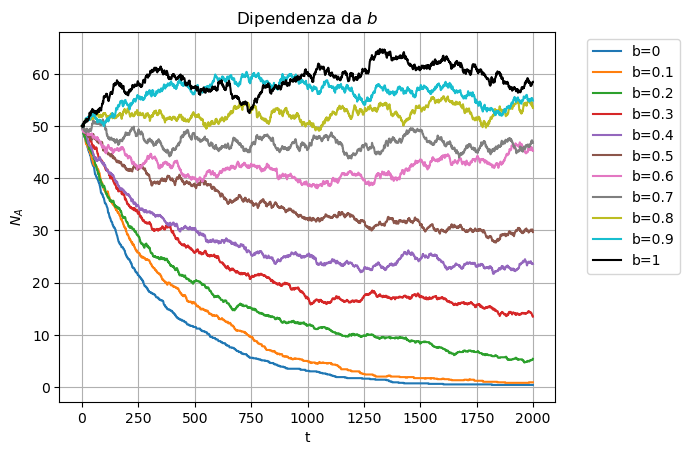

In [37]:

t=np.linspace(0,t_max-1,t_max)
matrice=matrix(11,t_max)
for k in range (0,11,1):
    
    n=np.zeros(t_max)
    b=0.1*k
    


    n[0]=n_0
    
    
    
    ntot=np.zeros(t_max)
    samples=10
    

    for i in range (0,samples):
        

        nascita_morte(n,t_max-1)
        ntot=ntot+n
        for j in range (0,t_max,1):
            matrice[k][j]=ntot[j]/samples
            
plt.plot(t,matrice[0],label="b=0")
plt.plot(t,matrice[1] ,label="b=0.1")
plt.plot(t,matrice[2],label="b=0.2")
plt.plot(t,matrice[3],label="b=0.3")
plt.plot(t,matrice[4],label="b=0.4")
plt.plot(t,matrice[5],label="b=0.5")
plt.plot(t,matrice[6],label="b=0.6")
plt.plot(t,matrice[7],label="b=0.7")
plt.plot(t,matrice[8],label="b=0.8")
plt.plot(t,matrice[9],label="b=0.9")
plt.plot(t,matrice[10],label="b=1",color='black')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("t")
plt.ylabel(r"$N_A$")
plt.title(r"Dipendenza da $b$")
b=0.5

### Dipendenza da d

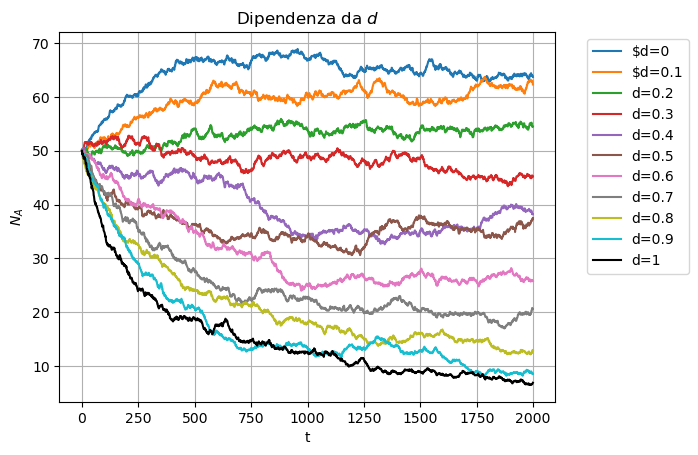

In [36]:
t=np.linspace(0,t_max-1,t_max)
matrice=matrix(11,t_max)
for k in range (0,11,1):
    
    n=np.zeros(t_max)
    d=0.1*k
    

    n[0]=n_0
    
    
    
    ntot=np.zeros(t_max)
    samples=10
    

    for i in range (0,samples):
        

        nascita_morte(n,t_max-1)
        ntot=ntot+n
        for j in range (0,t_max,1):
            matrice[k][j]=ntot[j]/samples
            
plt.plot(t,matrice[0],label="$d=0")
plt.plot(t,matrice[1] ,label="$d=0.1")
plt.plot(t,matrice[2],label="d=0.2")
plt.plot(t,matrice[3],label="d=0.3")
plt.plot(t,matrice[4],label="d=0.4")
plt.plot(t,matrice[5],label="d=0.5")
plt.plot(t,matrice[6],label="d=0.6")
plt.plot(t,matrice[7],label="d=0.7")
plt.plot(t,matrice[8],label="d=0.8")
plt.plot(t,matrice[9],label="d=0.9")
plt.plot(t,matrice[10],label="d=1",color='black')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("t")
plt.ylabel(r"$N_A$")
plt.title(r"Dipendenza da $d$")

d=0.5

### Dipendenza da c

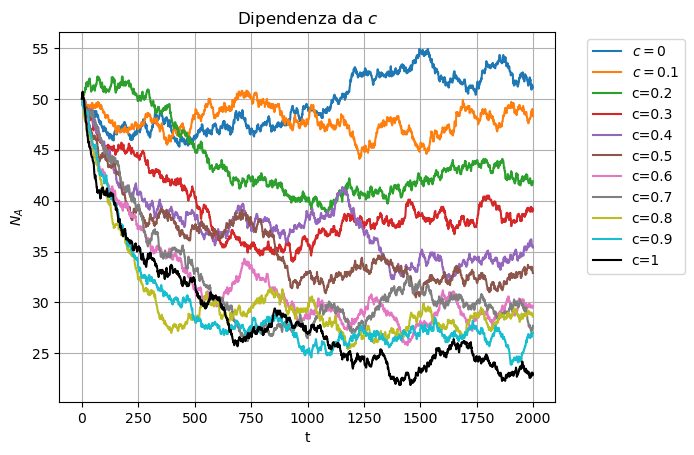

In [35]:

t=np.linspace(0,t_max-1,t_max)
matrice=matrix(11,t_max)
for k in range (0,11,1):
    
    n=np.zeros(t_max)
    c=0.1*k
    

    n[0]=n_0
    
    
    
    ntot=np.zeros(t_max)
    samples=10
    

    for i in range (0,samples):
        

        nascita_morte(n,t_max-1)
        ntot=ntot+n
    for j in range (0,t_max,1):
        matrice[k][j]=ntot[j]/samples
            
plt.plot(t,matrice[0],label="$c=0$")
plt.plot(t,matrice[1] ,label="$c=0.1$")
plt.plot(t,matrice[2],label="c=0.2")
plt.plot(t,matrice[3],label="c=0.3")
plt.plot(t,matrice[4],label="c=0.4")
plt.plot(t,matrice[5],label="c=0.5")
plt.plot(t,matrice[6],label="c=0.6")
plt.plot(t,matrice[7],label="c=0.7")
plt.plot(t,matrice[8],label="c=0.8")
plt.plot(t,matrice[9],label="c=0.9")
plt.plot(t,matrice[10],label="c=1",color='black')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("t")
plt.ylabel(r"$N_A$")
plt.title(r"Dipendenza da $c$")

c=0.5

In [41]:
N_fisso/N

0.33416666666666667

In [42]:
(2*bt-dt)-2*(2*bt+ct)*N_fisso/N

-0.0006281328320802004